In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset

df = pd.read_csv('Flight_Booking.csv')

In [3]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
df.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

In [5]:
# Removing unnecessary column from dataframe

df = df.drop(columns =['Unnamed: 0'])
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [6]:
# Checking the shape of the data

df.shape

(300153, 11)

In [7]:
# Checking the datatypes of the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [8]:
# Checking the statistical information of the data

df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [9]:
# Checking out missing values

df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

### Data Visualization

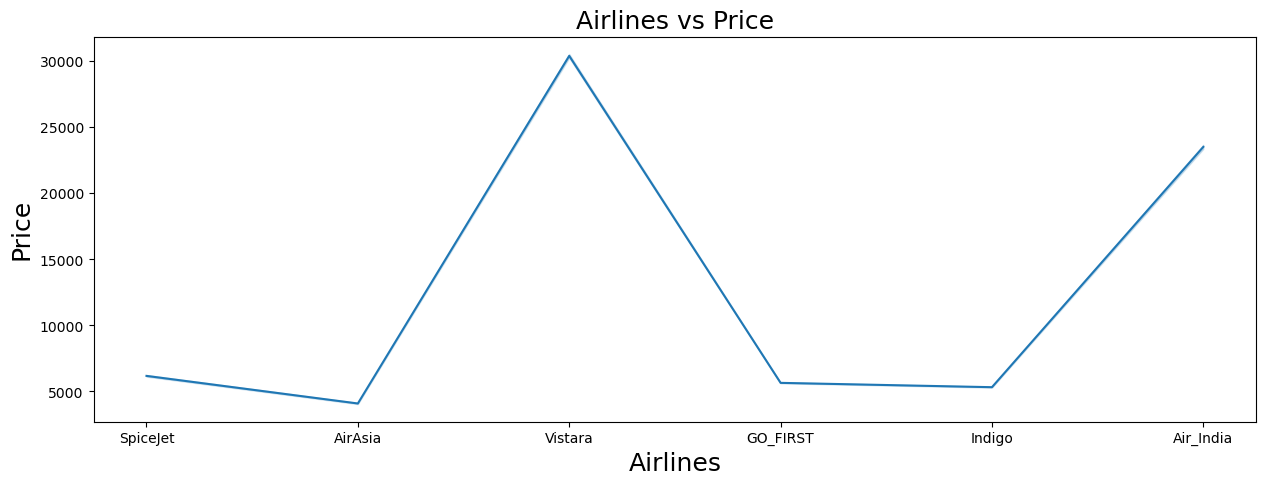

In [10]:
plt.figure(figsize = (15,5))
sns.lineplot(x=df['airline'], y=df['price'])
plt.title('Airlines vs Price', fontsize=18)
plt.xlabel('Airlines', fontsize=18)
plt.ylabel('Price', fontsize=18)
plt.show()

In [11]:
#### There is a variation in price with different airlines.

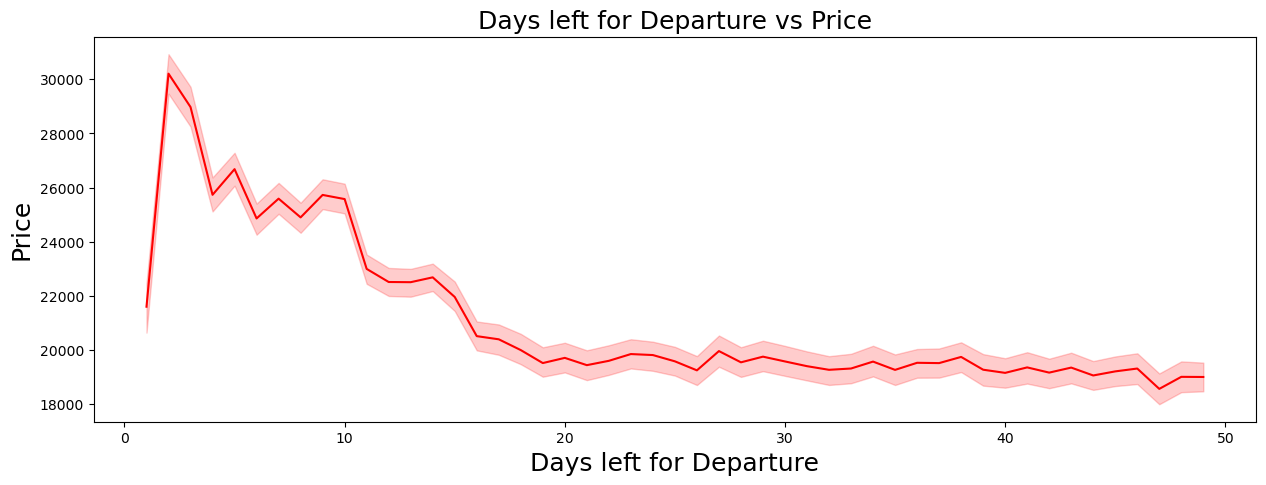

In [12]:
plt.figure(figsize = (15,5))
sns.lineplot(x=df['days_left'], y=df['price'], color='red')
plt.title('Days left for Departure vs Price', fontsize=18)
plt.xlabel('Days left for Departure', fontsize=18)
plt.ylabel('Price', fontsize=18)
plt.show()

In [13]:
#### The price of the flight increases as Days left for the departure decreases.

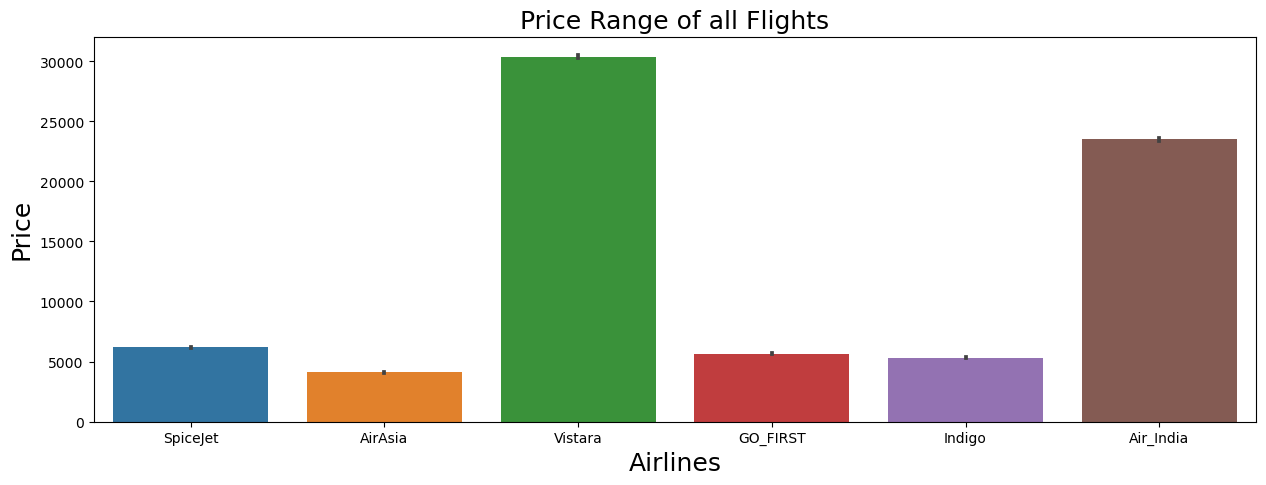

In [14]:
plt.figure(figsize = (15,5))
sns.barplot(x=df['airline'], y=df['price'])
plt.title('Price Range of all Flights', fontsize=18)
plt.xlabel('Airlines', fontsize=18)
plt.ylabel('Price', fontsize=18)
plt.show()

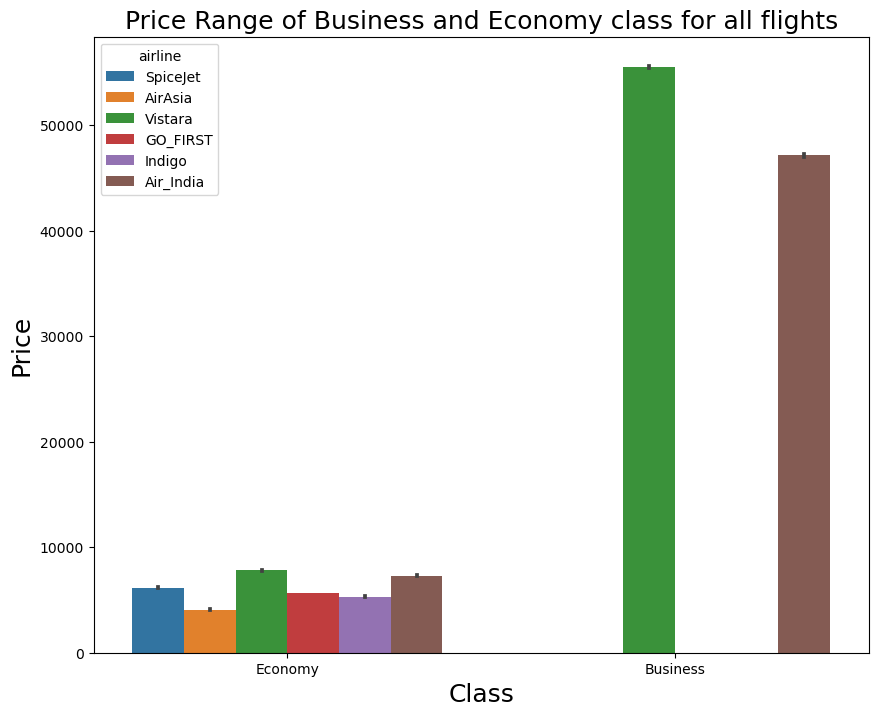

In [15]:
plt.figure(figsize = (10,8))
sns.barplot(data = df, x='class', y='price', hue='airline')
plt.title('Price Range of Business and Economy class for all flights', fontsize=18)
plt.xlabel('Class', fontsize=18)
plt.ylabel('Price', fontsize=18)
plt.show()

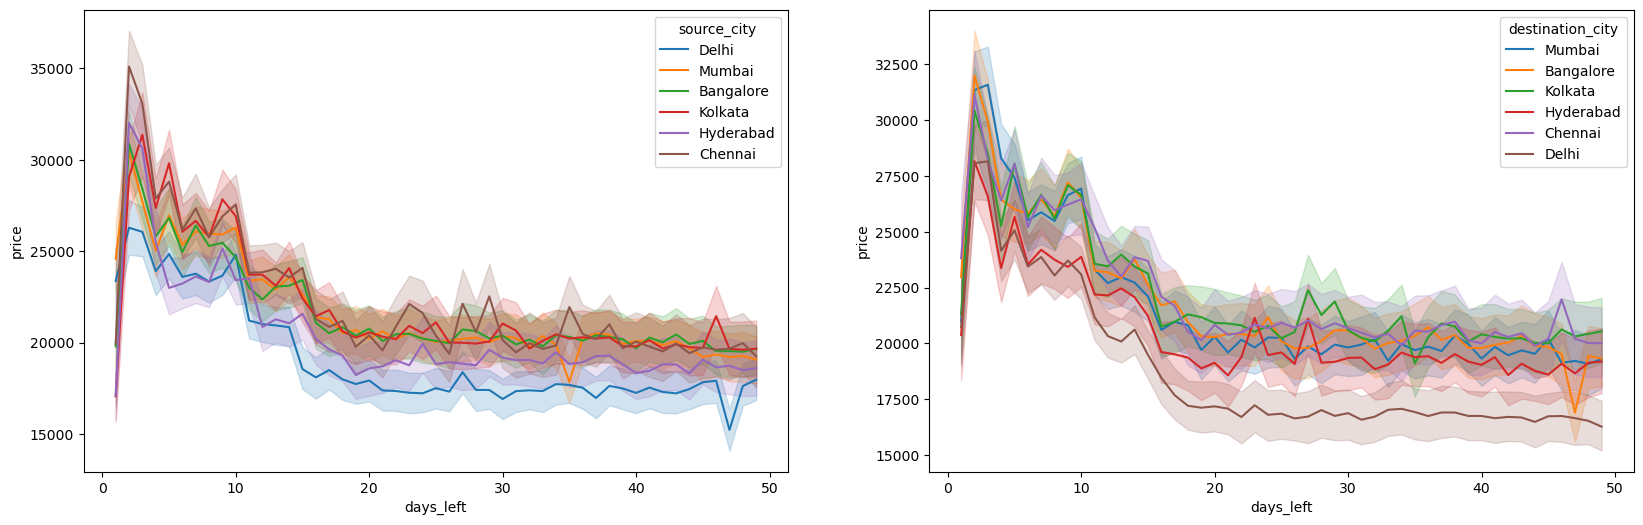

In [16]:
## Range of price of flights with source and destination city according to days left.

fig, ax = plt.subplots(1,2, figsize=(20,6))

sns.lineplot(data=df, x='days_left', y='price', hue='source_city', ax=ax[0])


sns.lineplot(data=df, x='days_left', y='price', hue='destination_city', ax=ax[1])


plt.show()

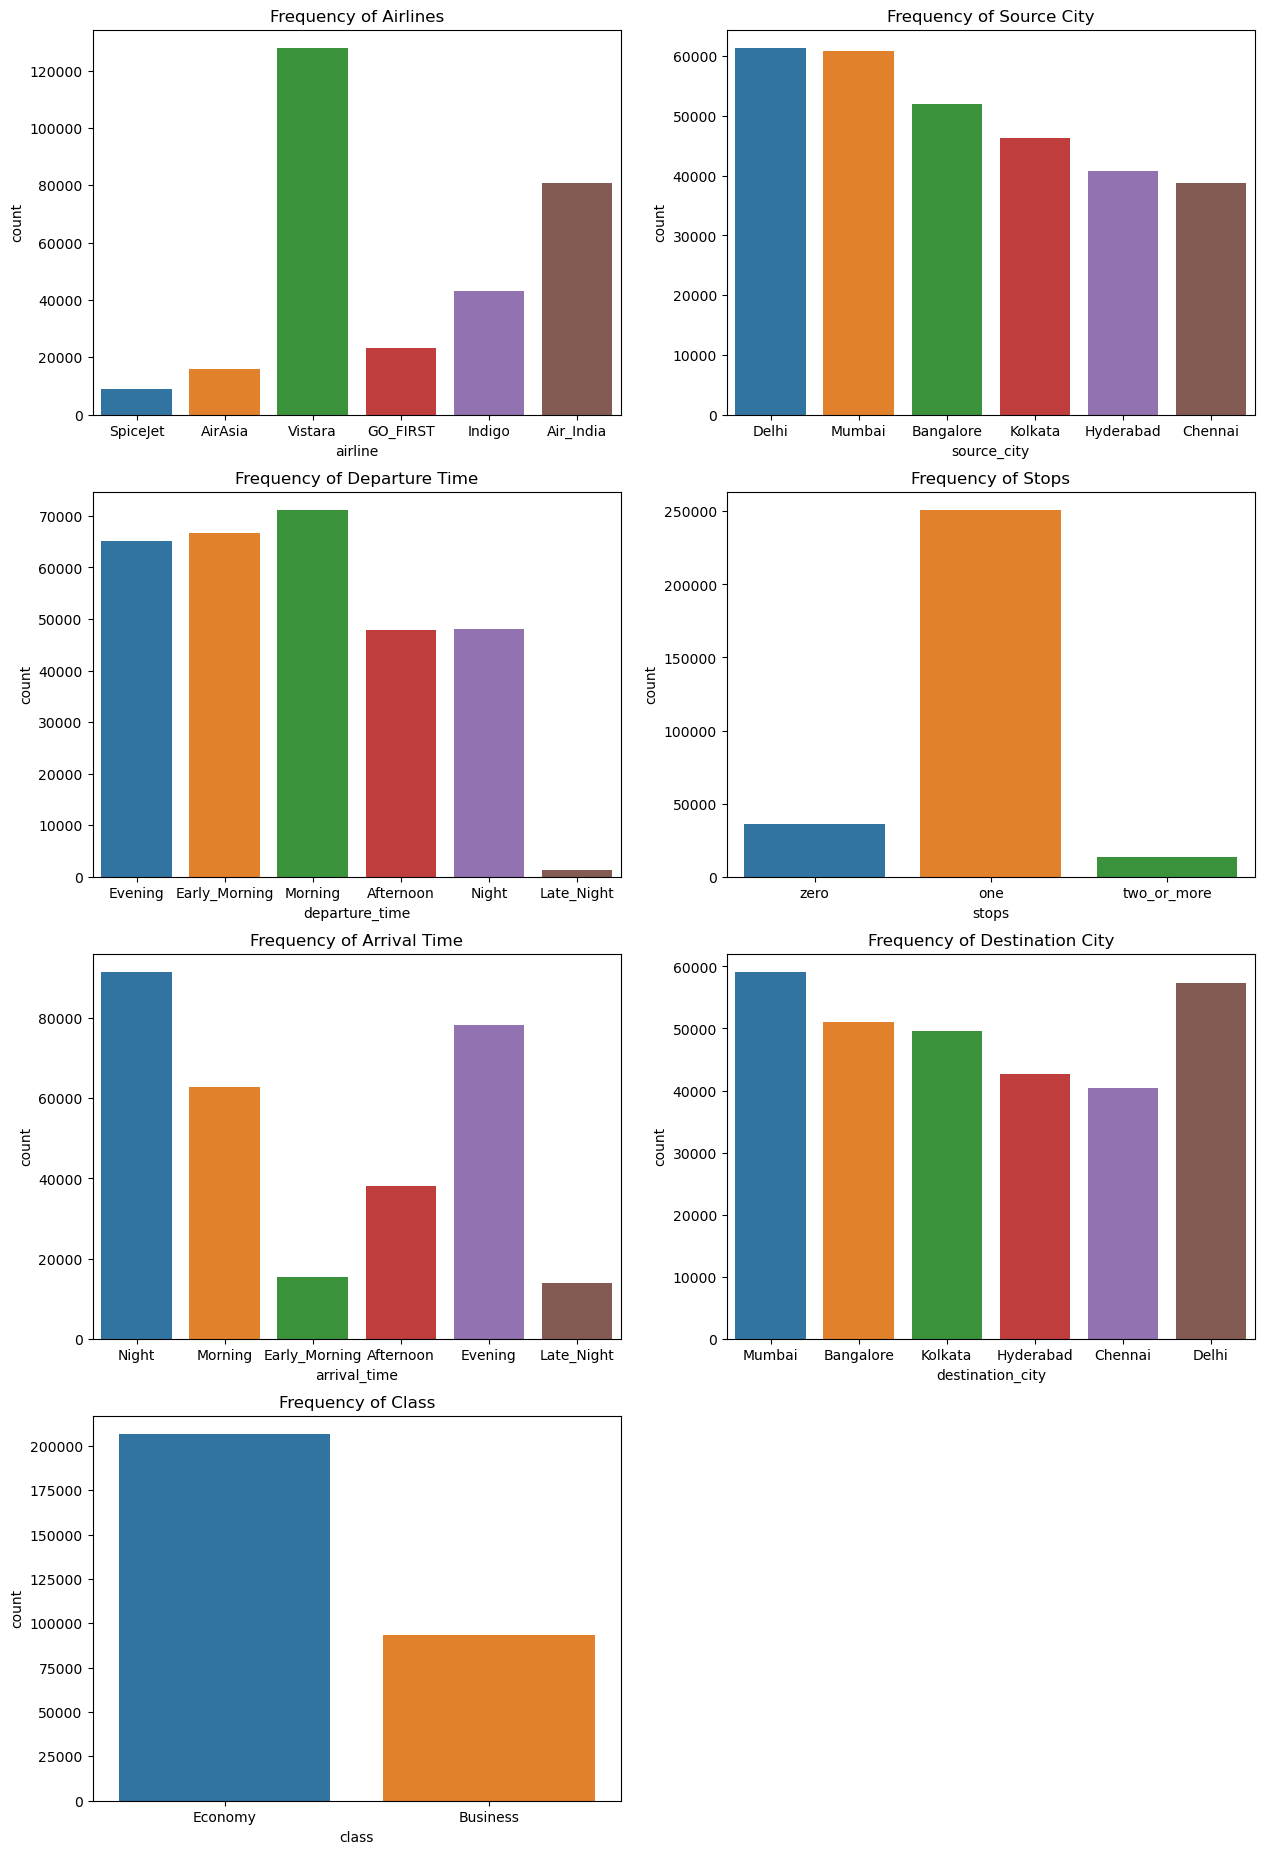

In [17]:
# Visualization of Categorical features with countplot.

plt.figure(figsize = (15,23))

plt.subplot(4,2,1)
sns.countplot(data=df, x='airline')
plt.title('Frequency of Airlines')

plt.subplot(4,2,2)
sns.countplot(data=df, x='source_city')
plt.title('Frequency of Source City')

plt.subplot(4,2,3)
sns.countplot(data=df, x='departure_time')
plt.title('Frequency of Departure Time')

plt.subplot(4,2,4)
sns.countplot(data=df, x='stops')
plt.title('Frequency of Stops')

plt.subplot(4,2,5)
sns.countplot(data=df, x='arrival_time')
plt.title('Frequency of Arrival Time')

plt.subplot(4,2,6)
sns.countplot(data=df, x='destination_city')
plt.title('Frequency of Destination City')

plt.subplot(4,2,7)
sns.countplot(data=df, x='class')
plt.title('Frequency of Class')

plt.show()

#### Label Encoding for categorical features of a dataframe.

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['airline'] = le.fit_transform(df['airline'])
df['source_city'] = le.fit_transform(df['source_city'])
df['departure_time'] = le.fit_transform(df['departure_time'])
df['stops'] = le.fit_transform(df['stops'])
df['arrival_time'] = le.fit_transform(df['arrival_time'])
df['destination_city'] = le.fit_transform(df['destination_city'])
df['class'] = le.fit_transform(df['class'])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int32  
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  int32  
 3   departure_time    300153 non-null  int32  
 4   stops             300153 non-null  int32  
 5   arrival_time      300153 non-null  int32  
 6   destination_city  300153 non-null  int32  
 7   class             300153 non-null  int32  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int32(7), int64(2), object(1)
memory usage: 17.2+ MB


In [20]:
df = df.drop(columns='flight')

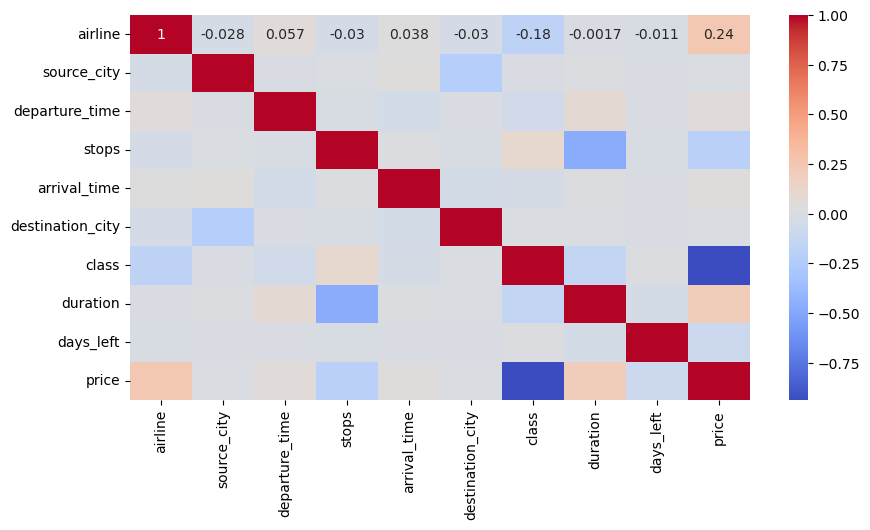

In [21]:
## Correalation graph to see correaltion between features and dependent variable.

plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [22]:
## Feature Selection  using VIF(Variance Inflation Factor)

from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list = []
for col in df.columns:
    if ((df[col].dtype != 'object') & (col != 'price') ):
        col_list.append(col)

X = df[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))] 
print(vif_data)

            feature       VIF
0           airline  3.393124
1       source_city  2.927766
2    departure_time  2.779427
3             stops  1.426614
4      arrival_time  3.684550
5  destination_city  2.885337
6             class  2.849370
7          duration  4.113876
8         days_left  3.976790


In [23]:
## VIF should be less than 5. Here all the columns have VIF less than 5.


#### Linear Regression 

In [24]:
X = df.drop(columns=['price'])
y = df['price']

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=0)

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
sc=StandardScaler()

In [29]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
lr = LinearRegression()

In [32]:
lr.fit(X_train, y_train)

LinearRegression()

In [33]:
y_pred = lr.predict(X_test)

In [34]:
error_pred=pd.DataFrame(columns=['Actual_data','Prediction_data'])

In [35]:
error_pred['Actual_data']=y_test
error_pred['Prediction_data']=y_pred

In [36]:
error_pred.head()

,Actual_data,Prediction_data
44712,10721,13027.077157
233644,66928,51379.152787
121467,6909,254.608768
185846,2271,-2943.718624
163599,4363,5995.634500


In [37]:
error_pred['Error']=error_pred['Actual_data']-error_pred['Prediction_data']

In [38]:
error_pred.head()

,Actual_data,Prediction_data,Error
44712,10721,13027.077157,-2306.077157
233644,66928,51379.152787,15548.847213
121467,6909,254.608768,6654.391232
185846,2271,-2943.718624,5214.718624
163599,4363,5995.634500,-1632.634500


In [39]:
from sklearn.metrics import *

In [40]:
r2_score_lr=r2_score(y_test, y_pred)
r2_score_lr

0.9052362375016471

In [41]:
mse_score = mean_squared_error(y_test, y_pred)
mse_score

48454460.72743338

In [42]:
rmse_score = np.sqrt(mean_squared_error(y_test, y_pred))
rmse_score

6960.923841519413

In [43]:
mae_score = mean_absolute_error(y_test, y_pred)
mae_score

4614.085748708886

In [44]:
mape_score = mean_absolute_percentage_error(y_test, y_pred)
mape_score

0.4390953679742711

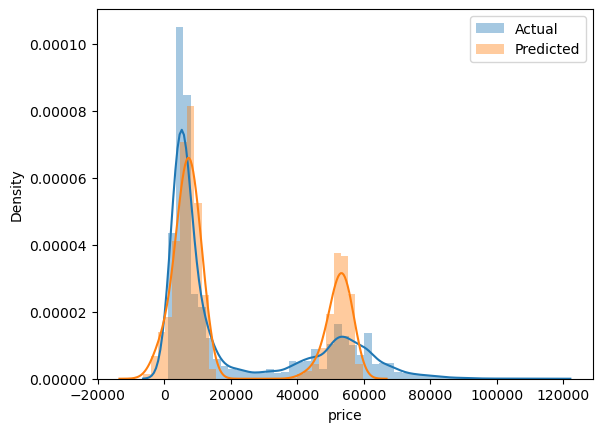

In [45]:
# Plotting the graph of actual and predicted price of the flight

import warnings

warnings.filterwarnings('ignore')

sns.distplot(y_test, label='Actual')
sns.distplot(y_pred, label='Predicted')
plt.legend()



#### Decision Tree Regressor

In [46]:
from sklearn.tree import DecisionTreeRegressor

In [47]:
dt=DecisionTreeRegressor()

In [48]:
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [49]:
y_pred_dt = dt.predict(X_test)

In [50]:
r2_score_dt=r2_score(y_test, y_pred_dt)
r2_score_dt

0.9768226841810566

In [51]:
mse_score_dt = mean_squared_error(y_test, y_pred_dt)
mse_score_dt

11850989.339261752

In [52]:
rmse_score_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
rmse_score_dt

3442.5265923826573

In [53]:
mae_score_dt = mean_absolute_error(y_test, y_pred_dt)
mae_score_dt

1155.2407589412137

In [54]:
mape_score_dt = mean_absolute_percentage_error(y_test, y_pred_dt)
mape_score_dt

0.0750422653128882

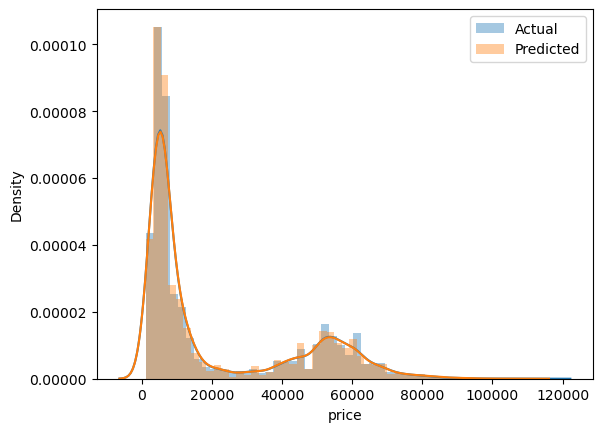

In [55]:
import warnings

warnings.filterwarnings('ignore')

sns.distplot(y_test, label='Actual')
sns.distplot(y_pred_dt, label='Predicted')
plt.legend()


In [56]:
## MAPE and RMSE Scores of Decision tree regressor are less than Linear Regression.

#### Random Forest Regressor

In [57]:
from sklearn.ensemble import RandomForestRegressor

In [58]:
rfr=RandomForestRegressor()

In [59]:
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [60]:
y_pred_rf=rfr.predict(X_test)

In [61]:
r2_score_rf=r2_score(y_test, y_pred_rf)
r2_score_rf

0.9854687224066717

In [62]:
mse_score_rf = mean_squared_error(y_test, y_pred_rf)
mse_score_rf

7430110.423038508

In [63]:
rmse_score_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rmse_score_rf

2725.822889154486

In [64]:
mae_score_rf = mean_absolute_error(y_test, y_pred_rf)
mae_score_rf

1076.651224411435

In [65]:
mape_score_rf = mean_absolute_percentage_error(y_test, y_pred_rf)
mape_score_rf

0.0710772241638168

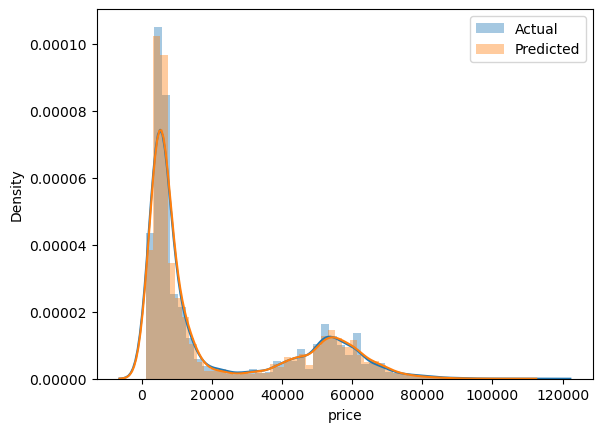

In [66]:
import warnings

warnings.filterwarnings('ignore')

sns.distplot(y_test, label='Actual')
sns.distplot(y_pred_rf, label='Predicted')
plt.legend()


### XGBoosting

In [67]:
from xgboost import XGBRegressor

In [68]:
xgbr = XGBRegressor()

In [69]:
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [70]:
y_pred_xgbr = xgbr.predict(X_test)

In [71]:
r2_score_xgbr=r2_score(y_test, y_pred_xgbr)
r2_score_xgbr

0.9761336681389198

In [72]:
mse_score_xgbr = mean_squared_error(y_test, y_pred_xgbr)
mse_score_xgbr

12203295.958101086

In [73]:
rmse_score_xgbr = np.sqrt(mean_squared_error(y_test, y_pred_xgbr))
rmse_score_xgbr

3493.3216224821163

In [74]:
mae_score_xgbr = mean_absolute_error(y_test, y_pred_xgbr)
mae_score_xgbr

2004.9821710290585

In [75]:
mape_score_xgbr = mean_absolute_percentage_error(y_test, y_pred_xgbr)
mape_score_xgbr

0.1497939644325251

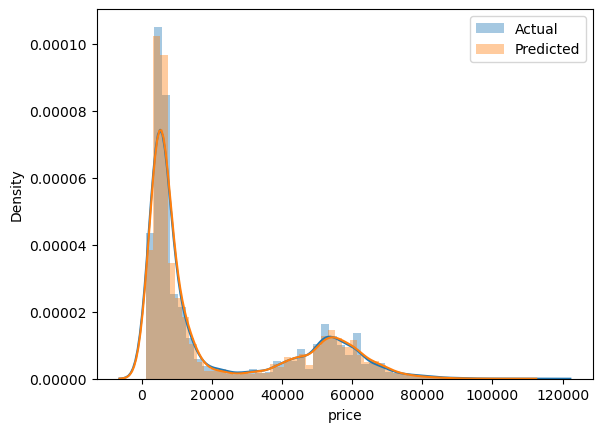

In [76]:
import warnings

warnings.filterwarnings('ignore')

sns.distplot(y_test, label='Actual')
sns.distplot(y_pred_rf, label='Predicted')
plt.legend()

In [77]:
models = ['Linear Regresson', 'Decision Tree', 'Random Forest','XGBoosting']
R2 =[r2_score_lr,r2_score_dt,r2_score_rf,r2_score_xgbr]
mape = [mape_score, mape_score_dt, mape_score_rf, mape_score_xgbr]
rmse = [rmse_score, rmse_score_dt, rmse_score_rf, rmse_score_xgbr]

models_score = pd.DataFrame({
    'Model' : models,
    "R2 Score":R2,
    'MAPE' : mape,
    'RMSE':rmse
})

models_score

,Model,R2 Score,MAPE,RMSE
0,Linear Regresson,0.905236,0.439095,6960.923842
1,Decision Tree,0.976823,0.075042,3442.526592
2,Random Forest,0.985469,0.071077,2725.822889
3,XGBoosting,0.976134,0.149794,3493.321622


In [78]:
## MAPE and RMSE scores of Random Forest Regressor are less than Linear Regression and Decision Tree models.

In [79]:
## Lower the RMSE and MAPE, BETTER the model.

In [80]:
## Here, we can conclude that Random Forest Regressor is better working model.